In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)

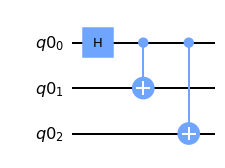

In [3]:
qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
qc.draw('mpl')

In [4]:
qc.measure_all()

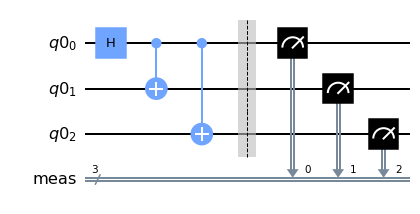

In [5]:
qc.draw('mpl')

In [6]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 525, '111': 499}


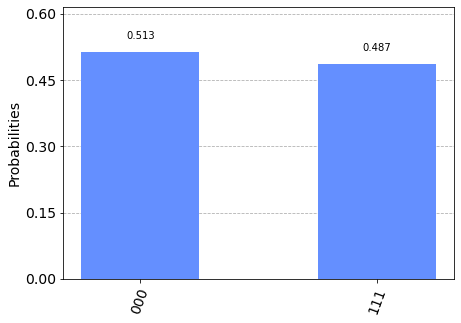

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [9]:
import qiskit.tools.jupyter 
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [12]:
from qiskit import IBMQ
IBMQ.save_account('5862d7c7d83f3fb5ce87620b3efb3831b7d691451c70ff0fd467f19b7cc6b1075a12456d82ee20e6d97e5846db1ea57498c64a6f04285272aeb049ade5ec7d70')
IBMQ.load_account()

In [17]:
provider = IBMQ.get_provider('ibm-q')

In [18]:
qcomp = provider.get_backend('ibmq_lima')

In [19]:
qc_compiled = transpile(qc,qcomp)

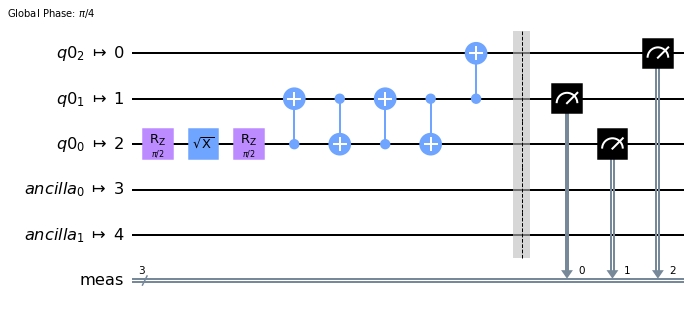

In [20]:
qc_compiled.draw('mpl')

In [ ]:
job = qcomp.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

In [ ]:
IBMQ.job.cancel()